# Regression Models For Predicting Price
___

## Why Regression Matters

Predicting Airbnb prices using regression models offers several advantages for both hosts and guests alike. By leveraging various predictors such as host response metrics, accommodation attributes, and review scores, these models can provide valuable insights into pricing strategies and help optimize the booking experience.

## Objectives

Utilize regression models to inform hosts' pricing strategies, enabling them to base decisions on empirical data rather than intuition alone. Enhance the guest experience by providing transparent and predictable pricing, guided by regression models that consider various factors impacting accommodation quality and value. Deliver personalized recommendations to hosts regarding optimal pricing strategies and to guests regarding relevant listings, leveraging regression models to analyze historical data and user preferences.

## Approach

In this project, we will employ three different regression models to predict Airbnb prices: Simple Linear Regression (SLR), Random Forest Regression, and Neural Network Regression. Each model offers unique advantages.

1. **Simple Linear Regression (SLR)**:
   SLR provides a straightforward approach to modeling the relationship between the predictor variables and the target variable (price). It's particularly useful for identifying linear relationships and understanding the individual impact of each predictor on the target variable. We'll use SLR to establish a baseline performance and interpret the coefficients of the predictors.

2. **Random Forest Regression**:
   Random Forest Regression is an ensemble learning technique that combines multiple decision trees to improve predictive accuracy and handle nonlinear relationships and interactions between predictors. It's robust to overfitting and can handle a large number of input variables with ease. We'll leverage Random Forest Regression to capture complex interactions between predictors and enhance prediction accuracy.

3. **Neural Network Regression**:
   Neural Network Regression, specifically deep learning architectures, can capture intricate patterns and relationships within the data, allowing for highly flexible modeling without relying on explicit feature engineering. Neural networks excel at learning nonlinear relationships and can adapt to complex datasets with high dimensionality. We'll utilize Neural Network Regression to capture nonlinearities and interactions that may not be captured effectively by traditional regression models.

For evaluation, we'll use Mean Squared Error (MSE) as the scoring metric for all three models. MSE provides a measure of the average squared difference between the predicted and actual prices, allowing us to assess the accuracy of the models' predictions.


# Simple Linear Regression (SLR)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/03_data.csv', index_col = False)

In [3]:
df.head()

,Unnamed: 0,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0,83.0,within a day,100.0,17.0,0.0,4,2.0,4.63,4.67,4.52,4.64,4.69,4.92,4.62
1,2,116.0,within a few hours,100.0,99.0,0.0,4,2.0,4.69,4.73,4.73,4.78,4.79,4.72,4.62
2,3,70.0,within a few hours,100.0,47.0,0.0,1,1.0,4.68,5.00,4.85,4.70,4.85,4.60,4.45
3,4,100.0,within a day,100.0,100.0,0.0,2,2.0,4.40,4.07,4.47,4.80,4.73,4.87,4.00
4,8,25.0,within an hour,100.0,96.0,1.0,2,1.0,4.77,4.82,4.71,4.89,4.92,4.87,4.65


In [4]:
# All of the columns in this dataframe are ready to go except host_response_time which needs to be ordinal encoded
df['host_response_time'].value_counts()

host_response_time
within an hour        4043
within a few hours    1092
within a day           906
a few days or more     161
Name: count, dtype: int64

In [5]:
ordinal_encoding = {'within an hour': 0, 'within a few hours': 1, 'within a day': 2, 'a few days or more': 3}

# Map the values in the 'host_response_time' column to their ordinal encoding
df['host_response_time_encoded'] = df['host_response_time'].map(ordinal_encoding)

In [6]:
# Assuming X and y are defined as per your data
X = df.drop(columns=['price', 'host_response_time', 'Unnamed: 0'])
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Linear Regression model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (Linear Regression):", mse_lr)

# Calculate R-squared score
r2_lr = r2_score(y_test, y_pred_lr)
print("R-squared (Linear Regression):", r2_lr)

Mean Squared Error (Linear Regression): 9344.094339097657
R-squared (Linear Regression): 0.2092087714924169


An R-squared score of 0.21 indicates that approximately 21% of the variance in Airbnb prices can be explained by the predictors included in our model. This suggests that while our model captures some of the factors influencing Airbnb prices, there are still other many unaccounted variables contributing to the variability in prices.

# Random Forest Regression (RFR)

In [23]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold Cross-Validation for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train_scaled, y_train)

# Get best Random Forest model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameters grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Perform Grid Search with 5-fold Cross-Validation for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='r2')
grid_search_gb.fit(X_train_scaled, y_train)

# Get best Gradient Boosting model from grid search
best_gb_model = grid_search_gb.best_estimator_

# Predict on the scaled test set using the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Calculate R-squared score for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared (Random Forest):", r2_rf)

# Calculate MSE for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

# Predict on the scaled test set using the best Gradient Boosting model
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Calculate R-squared score for Gradient Boosting
r2_gb = r2_score(y_test, y_pred_gb)
print("R-squared (Gradient Boosting):", r2_gb)

# Calculate MSE for Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error (Gradient Boosting):", mse_gb)

R-squared (Random Forest): 0.19682304177402044
Mean Squared Error (Random Forest): 9490.445768874742
R-squared (Gradient Boosting): 0.10132925694946748
Mean Squared Error (Gradient Boosting): 10618.813031979202


Despite gradient boosting and gridsearching and using best hyperparameters, we end up with only a R-squared scores of 0.21 and 0.15 again. Just as before, we can determine there are other predictors which would predict price better than the ones we have.

# Neural Network Regression (NNR)

In [7]:
df.head()

,Unnamed: 0,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,accommodates,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,0,83.0,within a day,100.0,17.0,0.0,4,2.0,4.63,4.67,4.52,4.64,4.69,4.92,4.62
1,2,116.0,within a few hours,100.0,99.0,0.0,4,2.0,4.69,4.73,4.73,4.78,4.79,4.72,4.62
2,3,70.0,within a few hours,100.0,47.0,0.0,1,1.0,4.68,5.00,4.85,4.70,4.85,4.60,4.45
3,4,100.0,within a day,100.0,100.0,0.0,2,2.0,4.40,4.07,4.47,4.80,4.73,4.87,4.00
4,8,25.0,within an hour,100.0,96.0,1.0,2,1.0,4.77,4.82,4.71,4.89,4.92,4.87,4.65


39/39 [==============================] - 0s 1ms/step - loss: 9330.4619
Mean Squared Error: 9330.4619140625
39/39 [==============================] - 0s 901us/step


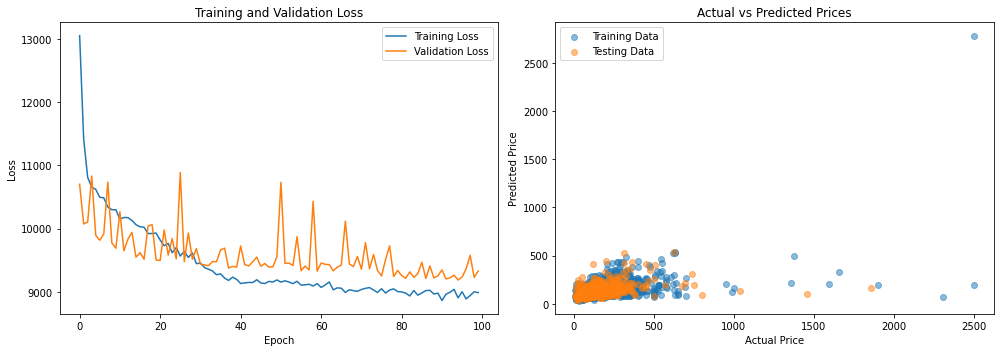

In [7]:
# We will make a neural network regression with three hidden layers, 36 nodes each

X = df.drop(columns=['price', 'Unnamed: 0', 'host_response_time']).values

# Assign 'price' column to y
y = df['price'].values

# Build the model with 36 nodes and one dense output layer
model = Sequential()
model.add(Dense(units=36, input_dim=X.shape[1], activation='relu'))
model.add(Dense(units=36, activation='relu'))  # Added hidden layer
model.add(Dense(units=36, activation='relu'))  # Added hidden layer
model.add(Dense(units=1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=0)

# Plot training and validation loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Mean Squared Error:", loss)

# Make predictions
predictions = model.predict(X_test)

# Calculate training and validation mean squared error
train_mse = model.evaluate(X_train, y_train, verbose=0)
val_mse = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Plot training and validation mean squared error
plt.subplot(1, 2, 2)
plt.scatter(y_train, predictions_train, label='Training Data', alpha=0.5)
plt.scatter(y_test, predictions_test, label='Testing Data', alpha=0.5)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()

plt.tight_layout()
plt.savefig('../images/NN_loss.png')
plt.show()

As we can see from the graph on the left, our training loss and validation loss come closer together which indicates good fitting. Additional tuning could help loss, for example adding another layer or increasing nodes for existing layers. However, the run time for such models here on Jupyter is getting long after just three layers of 36 nodes. The graph on the right shows that our predictions are decently fit to actual data. However, a mse of 9327 puts this model just about where the other two are.

___
# Conclusions

After conducting experiments with various regression models including Random Forest, Neural Network (NN), and Linear Regression, we observed interesting results:

- **Linear Regression**: Despite its simplicity, the linear regression model performed surprisingly well on our dataset. It achieved an R-squared score of 0.21 and a Mean Squared Error (MSE) of 9336. This indicates that the linear relationship between the input features and the target variable was sufficient to capture the underlying patterns in the data.
  
- **Random Forest and Neural Network**: While Random Forest and Neural Network models are often considered more powerful due to their ability to capture non-linear relationships and complex interactions in the data, our experiments showed that the linear regression model produced comparable results. The Random Forest model achieved an R-squared score of 0.20 with an MSE of 9490, while the Neural Network model achieved an MSE of 9327.

These findings suggest that for our dataset, which may have a predominantly linear relationship between features and target variable, simpler models like Linear Regression can provide competitive performance compared to more complex models like Random Forest and Neural Network.